# Multiclass classification with neural networks

Neural networks are adept at fitting non-linear datasets. To demonstrate, we'll fit a multiclass classifier to a four-class dataset generated with Scikit's [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function. Start by creating the dataset and plotting it. In the plot, purple corresponds to class 0, light blue corresponds to class 1, taupe corresponds to class 2, and red corresponds to class 3.

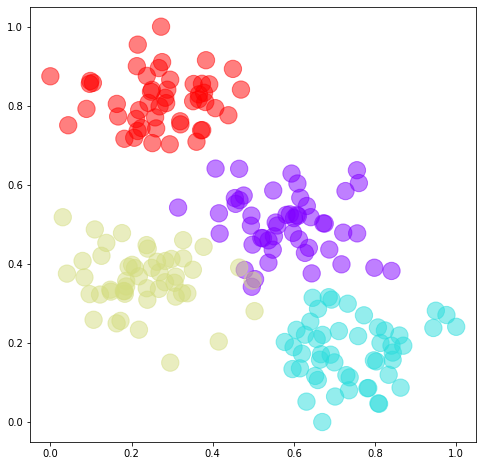

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=0.8, random_state=0)
x = MinMaxScaler().fit_transform(x)

plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=300, cmap='rainbow', alpha=0.5)

Define a simple neural network (a multilayer perceptron) with a single hidden layer. Since this network is intended to perform multiclass classification, include an output layer that contains four neurons (one per class) and uses the [softmax](https://keras.io/api/layers/activations/#softmax-function) activation function, and specify [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function) as the loss function.

In [2]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


Use the [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function) function to one-hot-encode the class labels. Then train the network. Use a small batch size since there are only 200 samples in the dataset..

In [3]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)
hist = model.fit(x, y_cat, validation_split=0.2, epochs=50, batch_size=10)

Epoch 1/50
16/16 [==============================] - 7s 18ms/step - loss: 1.3857 - accuracy: 0.1988 - val_loss: 1.3476 - val_accuracy: 0.2750
Epoch 2/50
16/16 [==============================] - 0s 227us/step - loss: 1.3235 - accuracy: 0.3067 - val_loss: 1.2990 - val_accuracy: 0.3750
Epoch 3/50
16/16 [==============================] - 0s 795us/step - loss: 1.2704 - accuracy: 0.4409 - val_loss: 1.2551 - val_accuracy: 0.4500
Epoch 4/50
16/16 [==============================] - 0s 797us/step - loss: 1.2134 - accuracy: 0.6049 - val_loss: 1.2127 - val_accuracy: 0.5750
Epoch 5/50
16/16 [==============================] - 0s 233us/step - loss: 1.1936 - accuracy: 0.5963 - val_loss: 1.1715 - val_accuracy: 0.5750
Epoch 6/50
16/16 [==============================] - 0s 302us/step - loss: 1.1236 - accuracy: 0.7348 - val_loss: 1.1291 - val_accuracy: 0.6250
Epoch 7/50
16/16 [==============================] - 0s 302us/step - loss: 1.0907 - accuracy: 0.7163 - val_loss: 1.0889 - val_accuracy: 0.6250
Epoch 8

Plot the training and validation accuracy.

[]

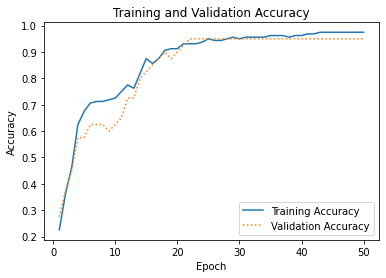

In [4]:
err = hist.history['accuracy']
val_err = hist.history['val_accuracy']
epochs = range(1, len(err) + 1)
 
plt.plot(epochs, err, '-', label='Training Accuracy')
plt.plot(epochs, val_err, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Predict class probabilities for a point that lies at (0.2, 0.8).

In [5]:
model.predict(np.array([[0.2, 0.8]]))[0]

array([9.0880049e-03, 3.6245806e-06, 3.1316552e-02, 9.5959175e-01],
      dtype=float32)

Predict which class a point that lies at (0.2, 0.8) belongs to.

In [6]:
np.argmax(model.predict(np.array([[0.2, 0.8]])), axis=1)[0]

3

Predict class probabilities for a point that lies at (0.8, 0.2).

In [7]:
model.predict(np.array([[0.8, 0.2]]))[0]

array([4.5855664e-02, 9.5148438e-01, 2.6302661e-03, 2.9666018e-05],
      dtype=float32)

Predict which class a point that lies at (0.8, 0.2) belongs to.

In [8]:
np.argmax(model.predict(np.array([[0.8, 0.2]])), axis=1)[0]

1